In [105]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

In [ ]:
print(df['nav_pct'].mean())
df.hist(column='nav_pct', bins = range(0,50))
plt.show()


df.plot(x="Gen", y = ["nav_pct"],
        kind="line", figsize=(15, 6))
plt.show()


In [106]:
print(df['WShare_VI'].iloc[-1])
print(df['WShare_NT'].iloc[-1])
print(df['WShare_TF'].iloc[-1])

31.40080410088917
57.27208967973528
11.327106219375557


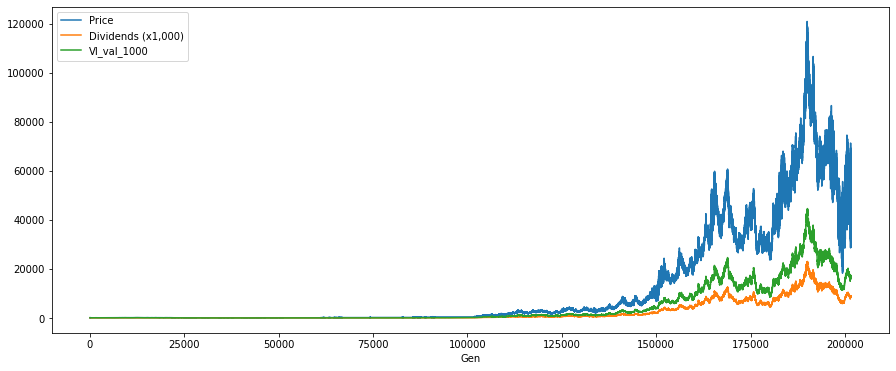

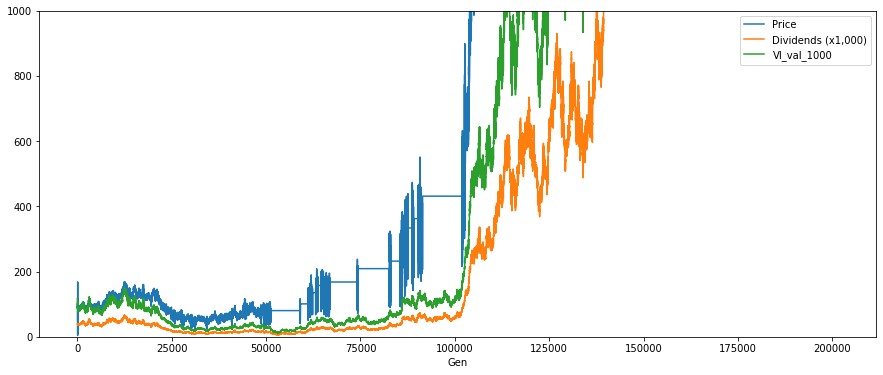

In [107]:
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()

df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6), ylim = (0,1_000))
plt.show()



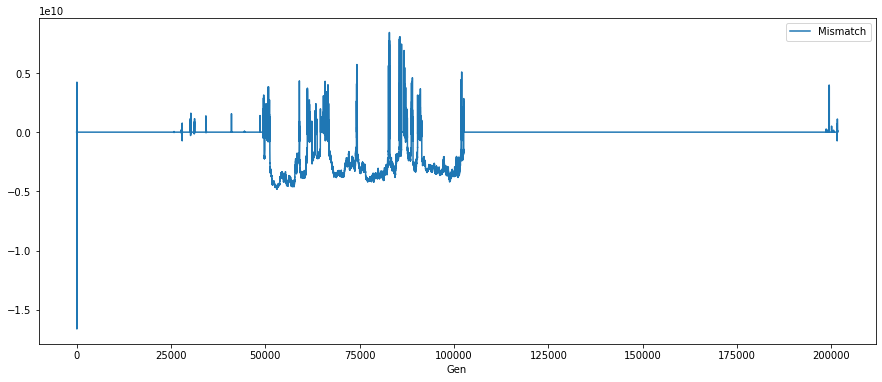

In [108]:

df.plot(x="Gen", y = ["Mismatch"],
        kind="line", figsize=(15, 6))
plt.show()


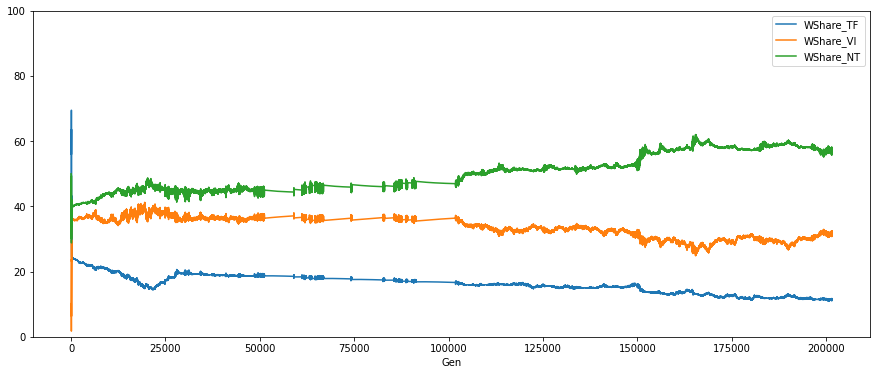

In [109]:

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
# plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()


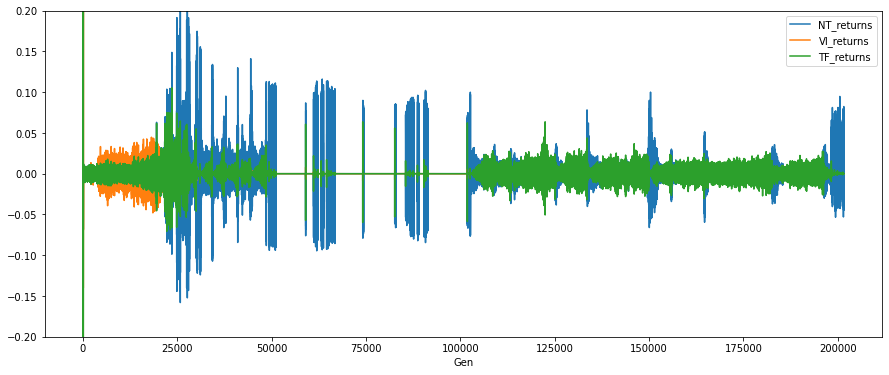

In [110]:

df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns"],
        kind="line", figsize=(15, 6), ylim=(-0.2,0.2))
plt.show()

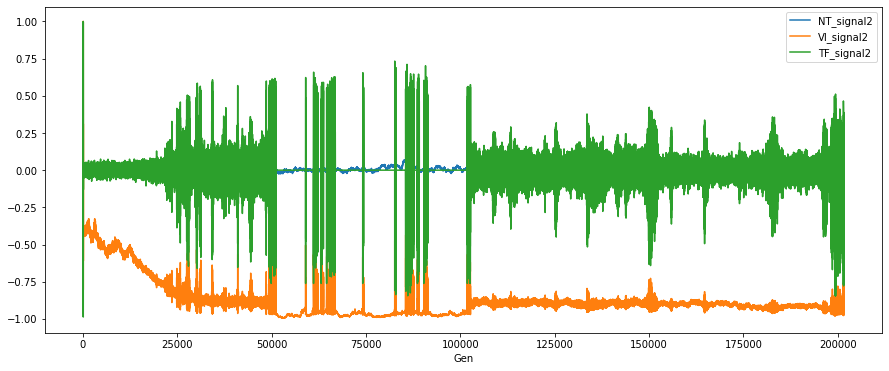

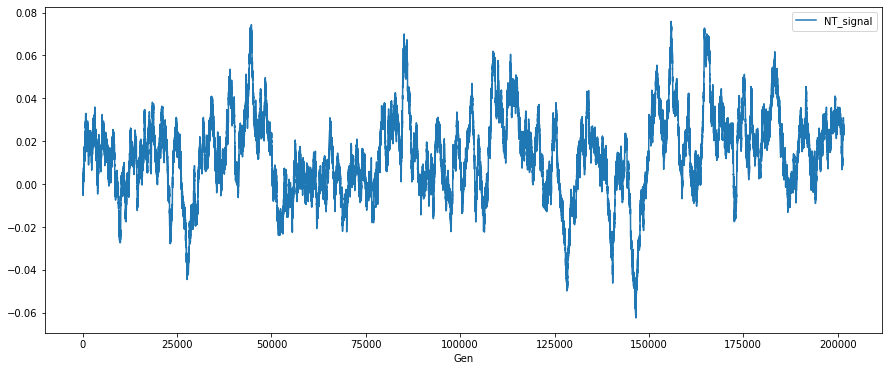

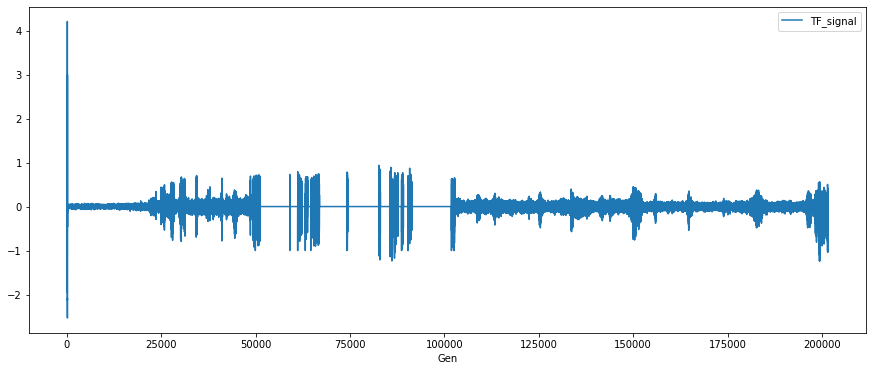

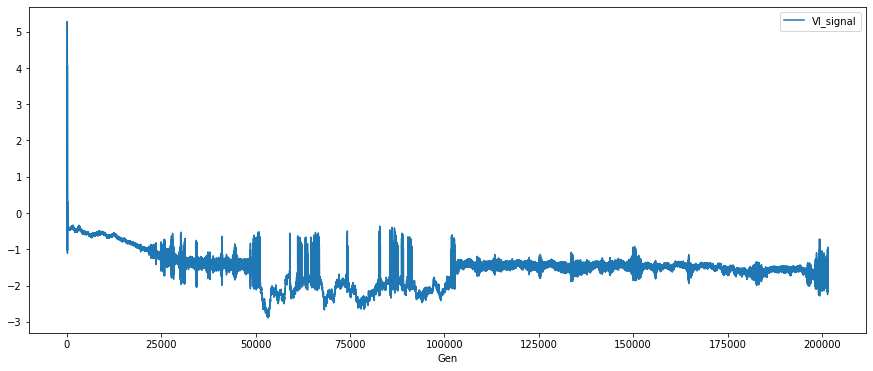

In [111]:
df['NT_signal2'] = np.tanh(df['NT_signal'])
df['VI_signal2'] = np.tanh(df['VI_signal'])
df['TF_signal2'] = np.tanh(df['TF_signal'])

df.plot(x="Gen", y=["NT_signal2", "VI_signal2", "TF_signal2"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y=["NT_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["TF_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["VI_signal"],
        kind="line", figsize=(15, 6))
plt.show()


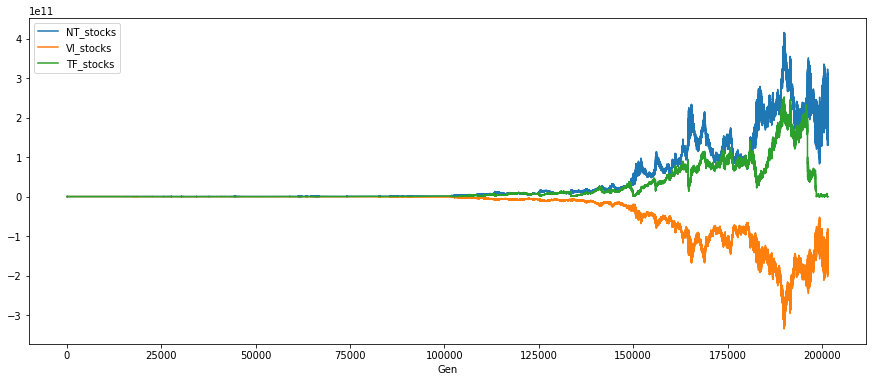

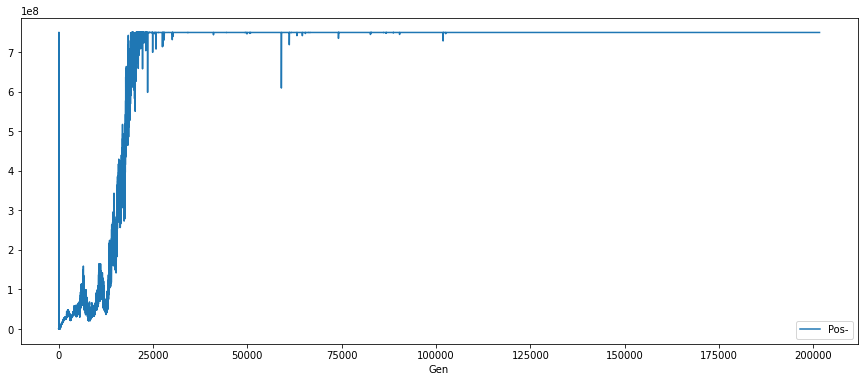

In [112]:
df.plot(x="Gen", y = ["NT_stocks", "VI_stocks", "TF_stocks"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["Pos-"],
        kind="line", figsize=(15, 6))
plt.show()


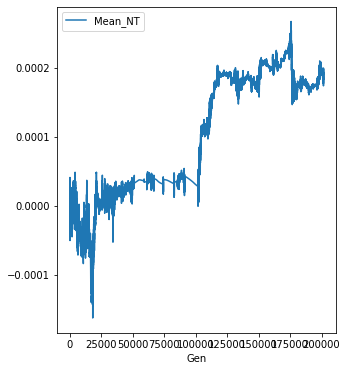

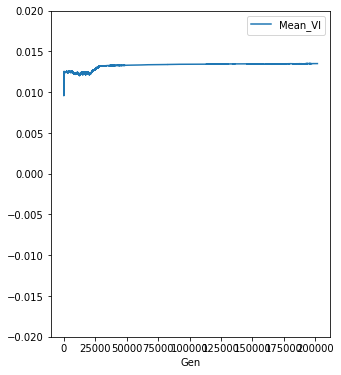

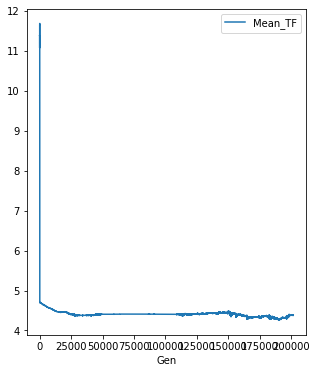

In [113]:

df.plot(x="Gen", y = ["Mean_NT"],
        kind="line", figsize=(5, 6))
plt.show()
df.plot(x="Gen", y = ["Mean_VI"],
        kind="line", figsize=(5, 6), ylim=(-0.02, 0.02))
plt.show()
df.plot(x="Gen", y = ["Mean_TF"],
        kind="line", figsize=(5, 6))
plt.show()

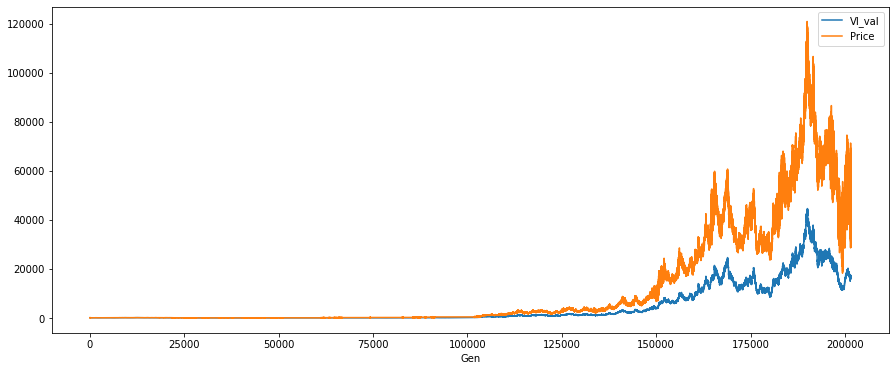

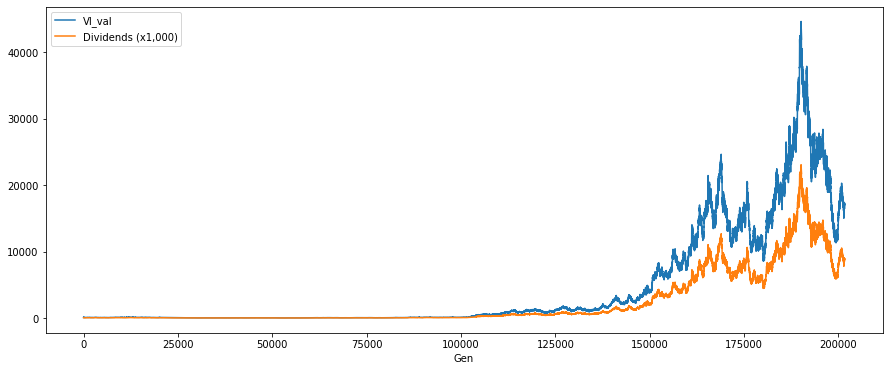

In [114]:
df.plot(x="Gen", y=["VI_val", "Price"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y=["VI_val", "Dividends (x1,000)"],
        kind="line", figsize=(15, 6))
plt.show()

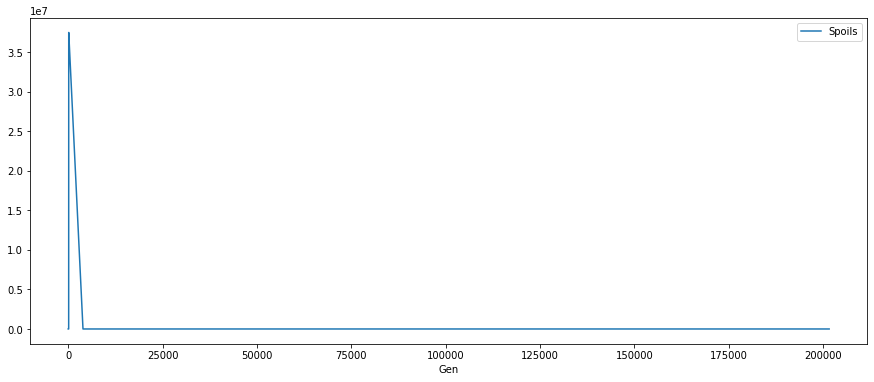

In [115]:
df.plot(x="Gen", y = ["Spoils"],
        kind="line", figsize=(15, 6))
plt.show()


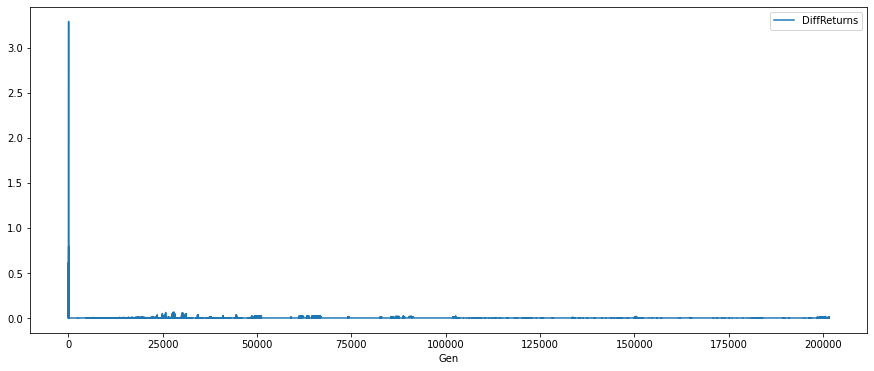

In [116]:
df.plot(x="Gen", y = ["DiffReturns"],
        kind="line", figsize=(15, 6))
plt.show()

In [117]:
if df['AvgT'].sum() != 0:

        print(df['AvgT'].mean())

        df.plot(x="Gen", y = ["AvgT", "HighestT","AvgAbsT"],
                kind="line", figsize=(15, 6))
        plt.show()


In [118]:
SharpeNT = np.nanmean(df['NT_returns']) / np.nanstd(df['NT_returns'])
SharpeVI = np.nanmean(df['VI_returns']) / np.nanstd(df['VI_returns'])
SharpeTF = np.nanmean(df['TF_returns']) / np.nanstd(df['TF_returns'])

print('Daily Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Daily mean returns 2 ')
print([np.nanmean(df['NT_returns']), np.nanmean(df['VI_returns']), np.nanmean(df['TF_returns'])])

DiffSharpe = (SharpeNT - SharpeVI) ** 2  + (SharpeNT - SharpeTF) ** 2 + (SharpeVI - SharpeTF) ** 2
print(DiffSharpe)



Daily Sharpe ratios 
0.017507703392853787 0.012759177216991628 0.008771885676600186
Daily mean returns 2 
[0.00031099182483821405, 7.465206760740573e-05, 5.898077572834263e-05]
0.00011476150584253555


158.0


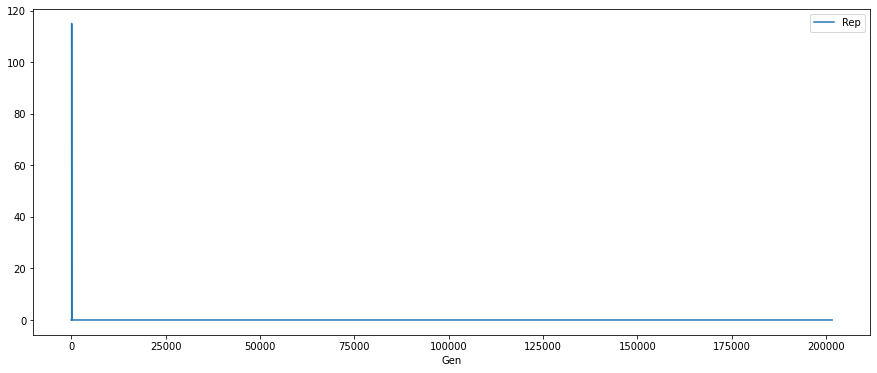

In [119]:
print(df['Rep'].sum())
if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

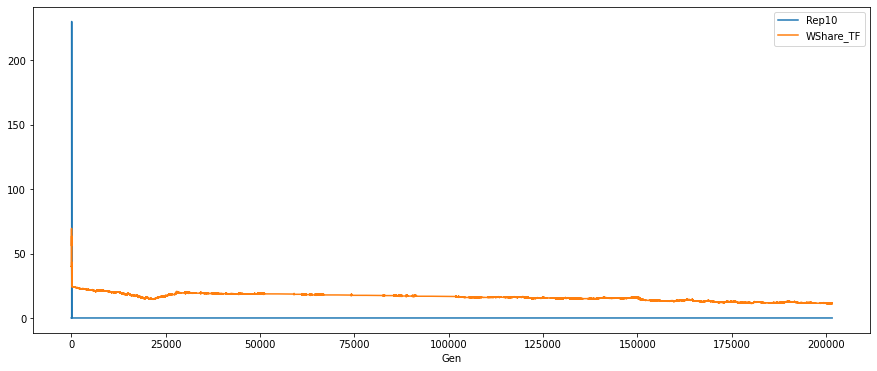

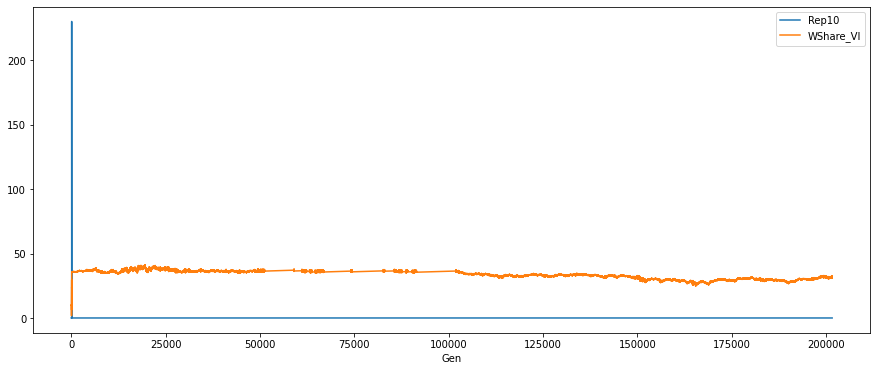

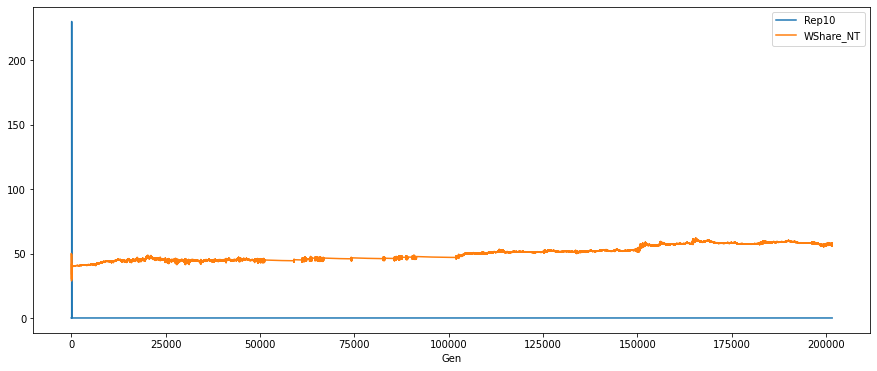

In [120]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [121]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

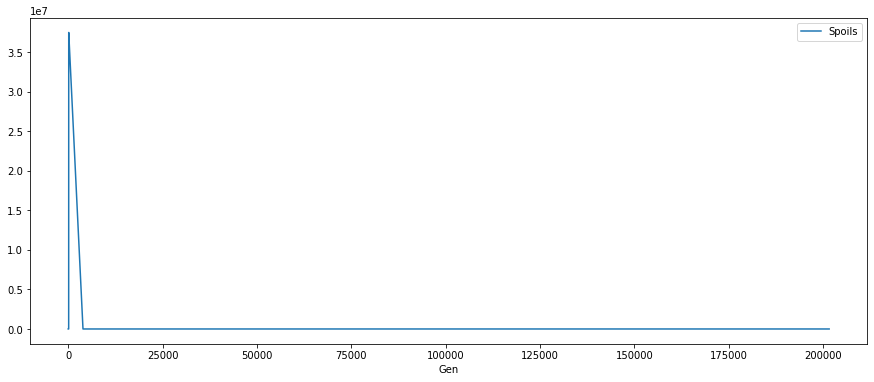

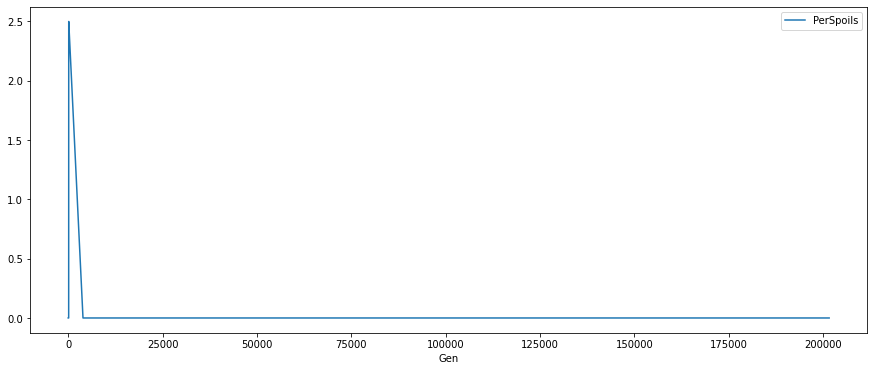

In [122]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

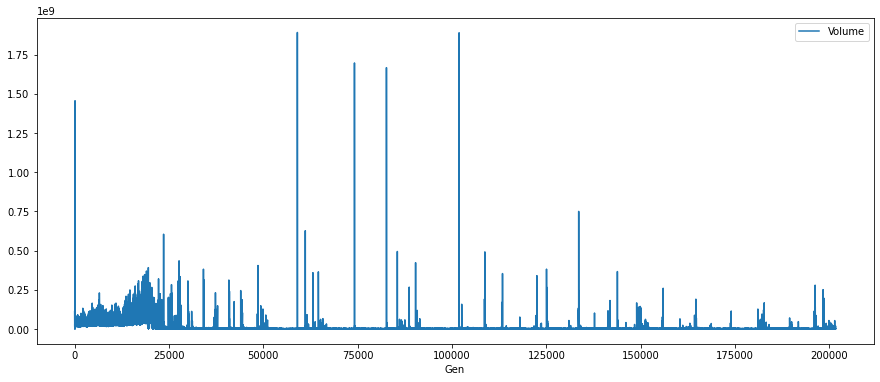

0         1.109930e+08
1         4.179418e+07
2         1.755008e+07
3         1.668862e+07
4         2.288575e+07
              ...     
201595    3.052058e-01
201596    3.099442e-05
201597    1.945360e+07
201598    5.558096e+05
201599    1.026948e+04
Name: Volume, Length: 201600, dtype: float64


In [123]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

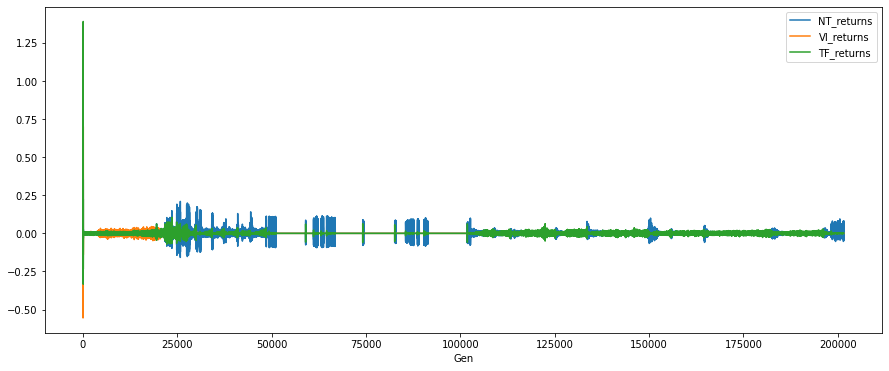

In [124]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns"],
        kind="line", figsize=(15, 6))
plt.show()

# df['DiffReturns'] = (df['NT_returns'] - df['VI_returns']) ** 2 + (df['NT_returns'] - df['TF_returns']) ** 2 + (df['VI_returns'] - df['TF_returns']) ** 2



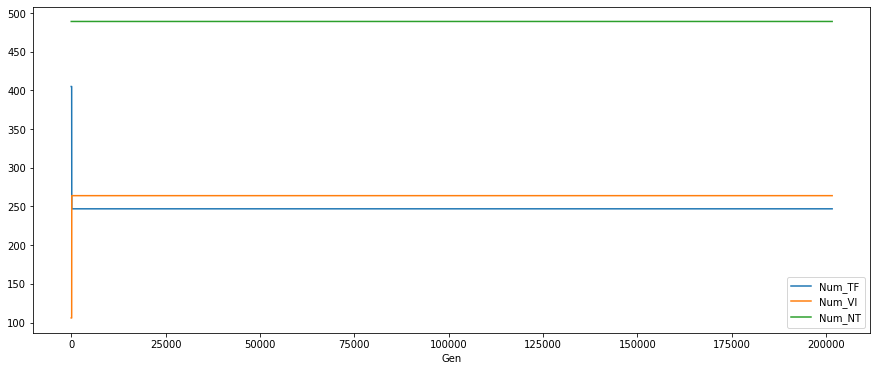

In [125]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


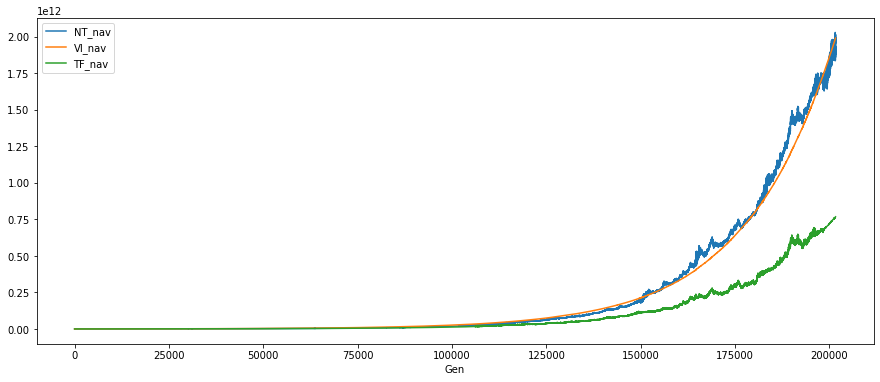

In [126]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()
